In [1]:
import numpy as np

In [2]:
class RidgeRegression(object):
    def __init__(self, lmbda=0.1):
        self.lmbda = lmbda
    
    # tính w dựa trên công thức 
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        C = X.T.dot(X) + self.lmbda*np.eye(X.shape[1])
        self.w = np.linalg.inv(C).dot(X.T.dot(y))

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return X.dot(self.w)

    def get_params(self, deep=True):
        return {"lmbda": self.lmbda}

    def set_params(self, lmbda=0.1):
        self.lmbda = lmbda
        return self
    
    def coef_(self):
        return np.delete(self.w, 0, 0)
    
    def intercept_(self):
        return self.w[0]
    

Công thức tính hệ số coeff:
![alt text](https://cdn-images-1.medium.com/max/1600/0*bsJSJzTDyUHB0jtN.png)

In [3]:
import pandas as pd
train_data = pd.read_csv('./1-prostate-training.csv', header=None)
train_data.head(10)

,0,1,2,3,4,5,6,7,8
0,1.665114,4.237778,64,2.073879,0,-1.387068,6,0,2.677591
1,0.269401,4.080930,65,1.960846,0,-0.792294,6,0,1.924249
2,3.825840,3.888853,44,-1.382499,1,2.183515,7,40,4.684443
3,-0.424693,3.513333,70,1.249222,0,-0.595768,7,30,1.470176
4,2.514151,3.467340,57,0.428525,0,2.318480,7,60,3.530763
5,0.288686,4.095910,65,1.960449,0,-0.806823,6,0,1.924249
6,-0.381821,3.504987,70,1.246730,0,-0.596905,7,30,1.470176
7,-1.046399,3.221741,50,-1.373105,0,-1.379131,6,0,0.765468
8,1.575711,3.739431,60,1.693815,0,0.824897,7,30,3.587677
9,1.664291,3.394136,61,0.622534,0,-1.376971,7,15,2.553344


In [4]:
test_data = pd.read_csv('./20156599-test.csv', header=None)
test_data

,0,1,2,3,4,5,6,7,8
0,2.027535,3.928119,66,1.998482,1,2.126745,7,60,2.882004
1,1.453784,3.138977,68,0.300940,0,-1.372993,6,0,1.766442
2,3.471793,3.985267,68,0.459405,1,2.917531,7,20,5.582932
3,1.428652,3.678361,68,-1.358086,0,-1.377852,7,10,2.307573
4,2.140976,4.132227,68,1.758901,0,1.446174,7,40,2.691243
5,2.083510,3.615401,64,-1.386598,0,-1.378612,6,0,0.000000
6,0.208232,3.247478,63,-1.388089,0,-1.382082,6,0,0.000000
7,1.772912,3.877749,61,-1.404772,0,0.797754,7,6,0.000000
8,0.387934,3.660868,69,1.604431,0,-1.405759,6,0,0.000000
9,-0.390665,3.863404,67,1.832334,0,-1.375914,7,20,0.000000


In [5]:
# thử với các lambda khác nhau và tính rss trên tập train
lmbdas = [0.1, 0.5, 1, 5]
data = pd.DataFrame(columns=['lambda','rss','cost'])
for lmbda in lmbdas:
    ridreg = RidgeRegression(lmbda)
    # tính ma trận w dựa vào x là giá trị 8 cột đầu và y là giá trị cột cuối
    x_train = train_data.values[:,:8]
    y_train = train_data.values[:,8:9]
    ridreg.fit(x_train, y_train)
    # rss = tổng (y - f(x))^2
    f_x = ridreg.predict(train_data.values[:,:8])
    rss = sum((y_train-f_x)**2) 
    cost = rss + lmbda*sum(ridreg.w**2)
    data = data.append({'lambda':lmbda,'rss':rss[0],'cost':cost[0]},ignore_index=True)
data

,lambda,rss,cost
0,0.1,121.675870,121.893179
1,0.5,121.779558,122.671021
2,1.0,121.916428,123.508210
3,5.0,122.826529,128.950749


Công thức tính rss
![rss](https://qph.fs.quoracdn.net/main-qimg-cbaf3d427784b4ee5cb8ff8fa55b6546)

Công thức tính cost function:
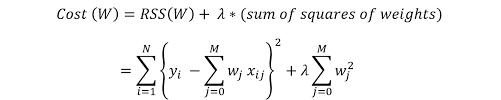

In [6]:
# lấy 5 hàng đầu trong file test làm tập test
x_test = test_data.values[0:5,:8]
y_test = test_data.values[0:5,8:9]
# thử tính rss trên tập test 
ridreg = RidgeRegression(0.1)
ridreg.fit(x_train, y_train)
f_x = ridreg.predict(x_test)
rss = sum((y_test-f_x)**2)
cost = rss + lmbda*sum(ridreg.w**2)
print('rss: %f'%rss[0])
print('cost: %f'%cost[0])

rss: 4.435754
cost: 15.301200


In [7]:
# OUTPUT
# predict 5 hàng cuối
x = test_data.values[5:10,:8]
y = ridreg.predict(x)

In [8]:
ridreg.coef_()

array([[ 0.58573643],
       [ 0.51664077],
       [-0.01341456],
       [ 0.16671418],
       [ 0.84627439],
       [-0.2345975 ],
       [-0.10719971],
       [ 0.01114076]])

In [9]:
ridreg.intercept_()

array([0.86733995])

In [10]:
y

array([[2.54611471],
       [1.27159193],
       [1.98601418],
       [2.01438683],
       [1.83640951]])

In [11]:
# tính lại với thư viện scikit-learn
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha = 0.1)
ridgereg.fit(train_data.values[:,:8], train_data.values[:,8:9])
ridgereg.predict(test_data.values[5:10,:8])

/home/damminhtien/anaconda3/envs/tf/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/damminhtien/anaconda3/envs/tf/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/damminhtien/anaconda3/envs/tf/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


array([[2.54681294],
       [1.27361452],
       [1.97662292],
       [2.0175189 ],
       [1.83074897]])